<img src="Branded_Logo_CUDenver.PNG" width="150">

## <center>CSCI 4580/5580 - Data Science – Spring 2022</center>
<center>Assignment 1: Exploratory Data Analysis and Statistics</center><center><font color='red'>Deadline: March 17, 2022 - 11:59 PM</font></center><center>Total Points: 100</center>

## Instructions
- Please note that this assignment must be done individually. By submitting this lab, you certify that this is your own work, your code will be checked against other submissions and resources using automatic tools. Everyone should be getting a hands on experience in this course. You are free to discuss course material with fellow students, and we encourage you to use Internet resources to aid your understanding, but the work you turn in, including all code and answers, must be your own work.

## Deliverables
You need to submit a single .ipynb file on Canvas, names your-lastname_your-first-name.ipynb. For example, if your name is John Smith, you should name the file smith_john.ipynb.
- Please do not include extra files such as the input datasets in your submission.
- Answer Questions 1 - 10 in the designated cells. Please do not add or remove any cells. 
- Please download your submission file after submission and make sure it is not corrupted. Use the 'Run All' option from the 'Cell' menu to ensure all cells run without any issues. We will not be responsible for corrupted submissions and will not take a resubmission after the deadline.

## Need Help?
If you need help with this lab, please email me at sundous.hussein@ucdenver.edu or come to my office hours. We also encourage you to ask your questions on the designated channel for the lab on Microsoft Teams. This way, you may receive assistance from your classmates that might’ve ran through the same issues.

# Overview
Exploratory Data Analysis (EDA) is the process of examining and visualizing a novel dataset to understand its characteristics and patterns, before attempting more formal analysis. 

### The Dataset

The dataset for this assignment is the Abalone Dataset. The dataset contains various attributs of abalone and is typically used to predict the age of abalone from physical measurements.

The data directory contains the following 2 files:

<b>abalone.data: </b> CSV file with attributes of 4177 abalones.

<b>abalone.names: </b> Text file containing full description of the dataset.

## Part 1: Reading the Dataset

#### Question 1 [5 Points]

Step 1 is to read the dataset. Look at the first few lines of the file. Notice that most columns are numeric, but the first collumn is string with one of three values (gender). 

In [1]:
import csv
def loaddatafile(fname):
    # Add your code here
    with open(fname) as csvfile:
        data = list(csv.reader(csvfile))
    return data

'abalone_raw' should be a list of records, and each record should be a list of strings

In [2]:
abalone_raw = loaddatafile("data/abalone.data")
print(abalone_raw[0])

['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15', '15']


#### Question 2 [15 Points]
Now construct the variable 'abalone' which is list of list of numbers from abalone_raw by parsing the numeric strings to float values. For the first column, map the string values to numeric ones. 
Create a dictionary 'sex_to_number' and inverse dictionary 'number_to_sex' to map between the string values and numeric values. 

In [3]:
# Convert the string table to a numeric one, and return the dictionaries
def raw_to_data(data): 
    
    #make a list
    numeric = []
    
    #male, female, unknown
    sex_to_numbers = { "M": 0, "F": 1, "U": 2}
    numbers_to_sex = { 0: "M", 1: "F", 2: "U"}
    
    #manually convert them as we go because we're not using pandas that would one line this for us 
    for row in data:
        item = row[0]
        if item == 'M':
            row[0] = 0
        elif item == 'F':
            row[0] = 1
        elif item == 'I':
            row[0] = 2
    numeric.append(row)
    
    return numeric, sex_to_numbers, numbers_to_sex

In [4]:
abalone, sex_to_numbers, numbers_to_sex = raw_to_data(abalone_raw)
print (f'sex to numbers: {sex_to_numbers}')
print (f'numbers to sex: {numbers_to_sex}')
print (f'the first row of the numerical data: {abalone[0]}')

sex to numbers: {'M': 0, 'F': 1, 'U': 2}
numbers to sex: {0: 'M', 1: 'F', 2: 'U'}
the first row of the numerical data: [0, '0.71', '0.555', '0.195', '1.9485', '0.9455', '0.3765', '0.495', '12']


## Part 2: Basic Statistics

#### Question 3 [5 Points]
Create a list of the column names for this dataset from the dataset description. Preserve the case and the spaces in these names.

In [5]:
import pandas as pd
abalone_names = loaddatafile("data/abalone.names")
names = pd.DataFrame(abalone_names)
names

#well that's annoying lol. Opened up the abalone.names file in notebook and just manually copied the names over

,0,1,2,3
0,1. Title of Database: Abalone data,None,None,None
1,None,None,None,None
2,2. Sources:,None,None,None
3,None,None,None,None
4,(a) Original owners of database:,None,None,None
...,...,...,...,...
140,\t26\t1,None,None,None
141,\t27\t2,None,None,None
142,\t29\t1,None,None,None
143,\t-----\t----,None,None,None


In [6]:
col_names = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
col_names

['Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight',
 'Rings']

#### Question 4 [5 Points]
Now create a dictionary 'name_to_index' mapping column name to column.

In [7]:
# Add your code here
name_to_index = {"Sex": 0, "Length" :1, "Diameter" :2, "Height":3, "Whole weight":4, "Shucked weight": 5, "Viscera weight":6, "Shell weight":7, "Rings":8}
name_to_index

{'Sex': 0,
 'Length': 1,
 'Diameter': 2,
 'Height': 3,
 'Whole weight': 4,
 'Shucked weight': 5,
 'Viscera weight': 6,
 'Shell weight': 7,
 'Rings': 8}

#### Question 5 [10 Points]
Use name_to_index to define a get_column function which returns a named column from the abalone table.

In [8]:
def get_column(name):
    df = pd.DataFrame(abalone_raw)
    #id pass this in normally lol
    col_names = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
    df.columns = col_names
    
    return df[name].astype(float)
    
    

In [9]:
print(get_column('Height'))

0       0.095
1       0.090
2       0.135
3       0.125
4       0.080
        ...  
4172    0.165
4173    0.135
4174    0.205
4175    0.150
4176    0.195
Name: Height, Length: 4177, dtype: float64


#### Question 6 [10 Points]
use numpy to compute the min, max, average and std deviation of the Height column.

In [10]:
import numpy as np

In [11]:
heights = get_column('Height').astype(float)
height_stats = []


height_stats.append(np.min(heights))
height_stats.append(np.max(heights))
height_stats.append(np.mean(heights))
height_stats.append(np.std(heights))


print(f'min: {height_stats[0]}')
print(f'max: {height_stats[1]}')
print(f'average: {height_stats[2]}')
print(f'std: {height_stats[3]}')

min: 0.0
max: 1.13
average: 0.1395163993296614
std: 0.041822049477699706


#### Question 7 [15 Points]
Now create a 9x5 pandas dataframe. Each row of the table should be a column name followed by the values of min, max, mean, and std for that column.

In [12]:
df = pd.DataFrame(abalone_raw, columns = col_names)

#df wasn't letting describe show all of the values so I assumed that it was because not all of the rows were numbers
#so this converts it all to numbers and coerce forces the null values to NaN
df = df.apply(pd.to_numeric, errors='coerce')

#for me to play with
q7 = df.copy()

#only shows the 4 rows that we want, idk what other values you want with it being a 9x5 but asking for 
q7.describe().loc[['min','max', 'mean', 'std']]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000
mean,0.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169


## Part 3: Histograms

#### Question 8 [15 Points]
Now create a 3x3 grid of histograms, one for each column. Make sure your figure is large enough (should consume most of the width of the page). We recommend you use matplotlib.pyplot and its 'subplots' function. Include the column name as a title above each subfigure. You must use loops rather than enumerating all 9 column names.

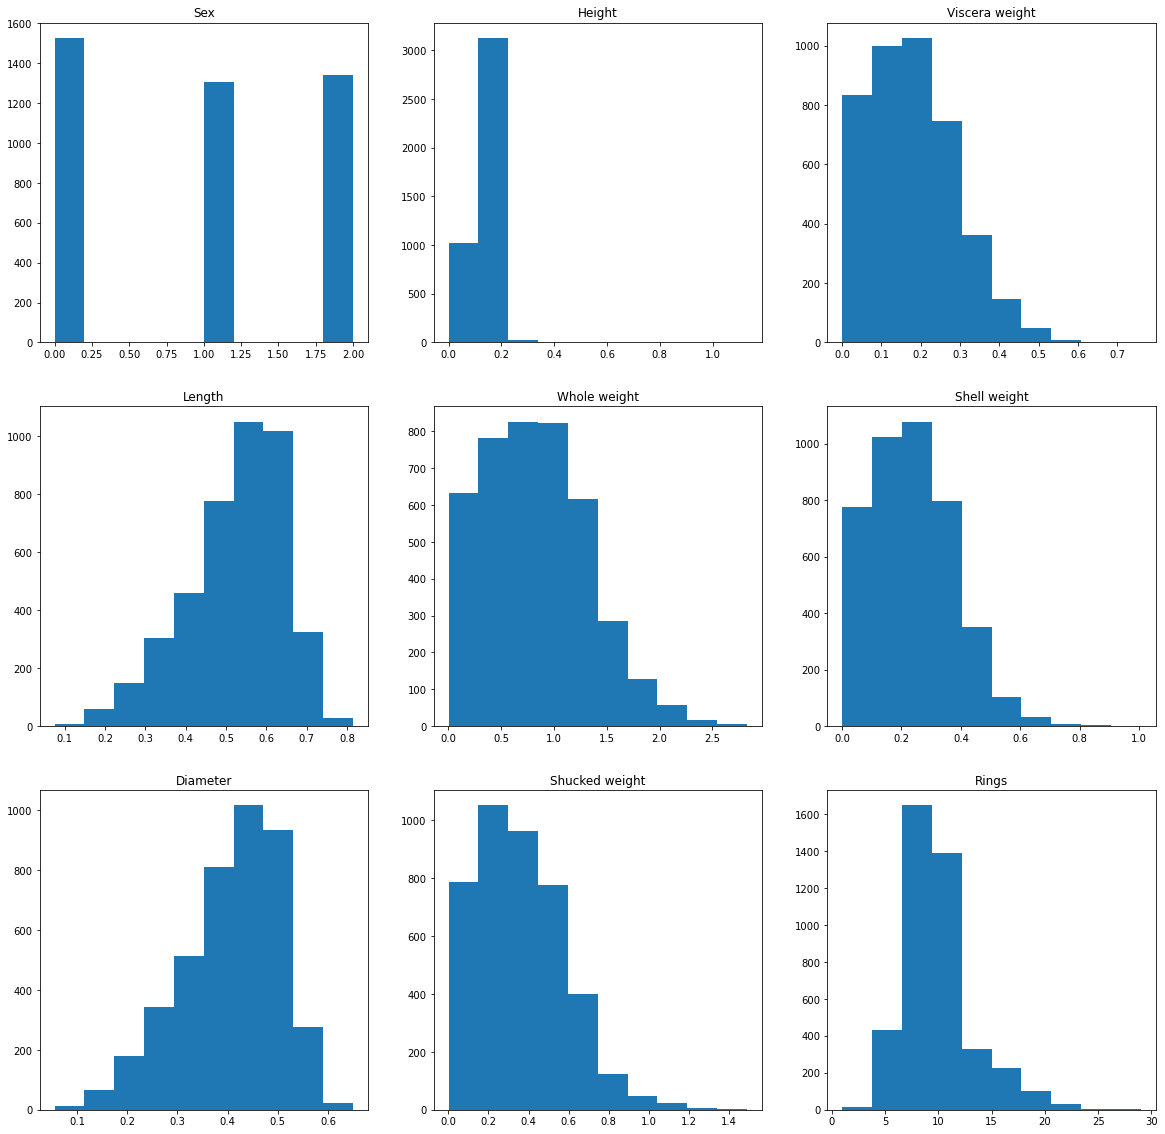

In [13]:
import matplotlib.pyplot as plt
#i mean, this would realistically do the job in one line
# df.hist(bins = 10) or whatever number of bins we'd want you know? 


#here we gooooo
#at it with the loops 
fig, ax = plt.subplots(3, 3, figsize = (20,20))

for i in col_names:
    column = get_column(i)
    mapping = name_to_index[i]
    
    #for positioning
    x_axis = mapping % 3
    y_axis = mapping // 3
    
    ax[x_axis, y_axis].hist(column)
    ax[x_axis, y_axis].set_title(i)

#plt.show()
#how to individually label axis's in a lopp, conveniently 

## Part 4: Scatter plots

#### Question 9 [15 Points]
Now ceate a grid of scatter plots for each column vs the "Rings" column. Use color to distinguish the sex of the specimen in each plot. Make titles of the form "&lt;colname&gt; vs Rings". Its fine to include "Rings vs Rings" as the last plot. Add regression lines to the scatter plots.

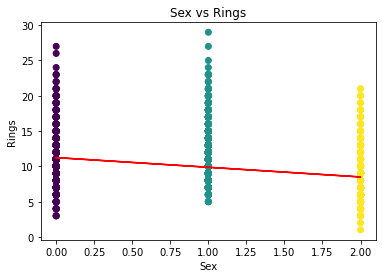

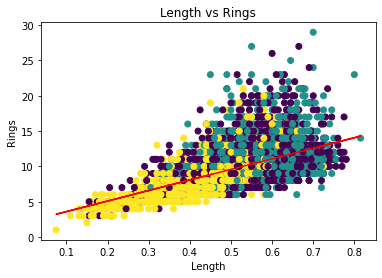

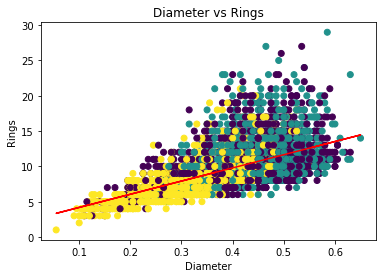

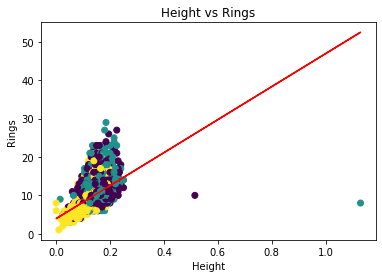

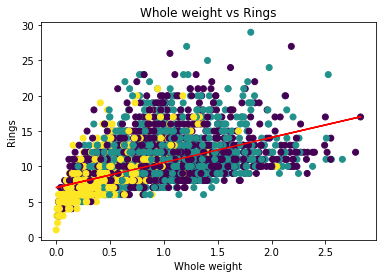

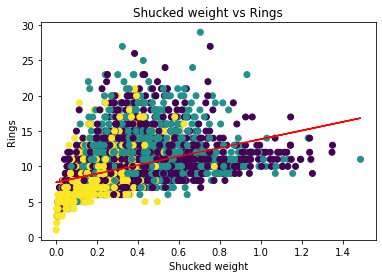

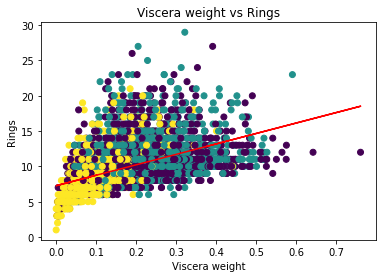

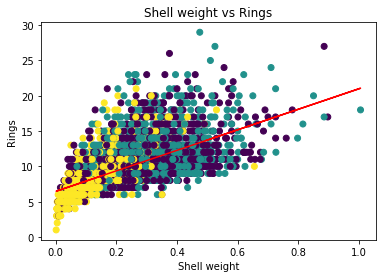

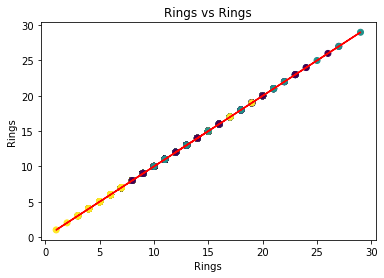

In [14]:
from sklearn.linear_model import LinearRegression
#fig, ax = plt.subplots(3, 3, figsize = (20,20))

for column in df:
    
    #reshape columns
    X = df[column].values.reshape(-1, 1)  
    Y = df["Rings"].values.reshape(-1, 1)  
    
    #regression
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)

    #plotting, setting the colors based on sex(random) and making regression line red
    plt.scatter(X, Y, c = df["Sex"] )
    plt.plot(X, Y_pred, color='red')
    
    #titles
    plt.title(column + " vs Rings")
    plt.ylabel("Rings")
    plt.xlabel(column)
    
    plt.show()
    

#this works fine but there's no regression line so I gotta try something else 
# print("Unknown sex is there, the color scheme is black, white and grey lol")
# df.plot.scatter(x = "Sex", y = "Rings" , style = "o", title = "Sex vs Rings", c = df1["Sex"] )
# df.plot.scatter(x = "Length", y = "Rings", style = "o", title = "Length vs Rings",  c = df1["Sex"])
# df.plot.scatter(x = "Diameter", y = "Rings", style = "o", title = "Diameter vs Rings",  c = df1["Sex"])
# df.plot.scatter(x = "Height", y = "Rings", style = "o", title = "Height vs Rings",  c = df1["Sex"])
# df.plot.scatter(x = "Whole weight", y = "Rings", style = "o", title = "Whole Weight vs Rings",  c = df1["Sex"])
# df.plot.scatter(x = "Shucked weight", y = "Rings", style = "o", title = "Shucked Weight vs Rings",  c = df1["Sex"])
# df.plot.scatter(x = "Viscera weight", y = "Rings", style = "o", title = "Viscera Weight vs Rings",  c = df1["Sex"])
# df.plot.scatter(x = "Shell weight", y = "Rings", style = "o", title = "Shell Weight vs Rings",  c = df1["Sex"])



#### Question 10 [5 Points]
Do you notice any issues with the dataset? e.g. outliers?  

For the most part, everything seems pretty consistent with the regression lines. There are a few outliers from time to time, like in the Height VS Rings chart, but nothing is too out of the norm. All of the data points, even though can be scattered pretty far away from the regression line, they are all clustered together so it is not just one outlier that sticks out, it is a group of them. It might be better to show outliers using clustering rather than a line.   
Majority of the comparisons are related to rings. As the number of rings go up, the other comparing variable also goes up. I don't feel like there's anything to comment on sex. Height would be the only one that doesn't correlate as strongly, but it's not like they also get to grow THAT large either